In [1]:
import pandas as pd
filename = 'diabetes_prediction_dataset.csv'
df = pd.read_csv(filename)
print(df)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [2]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
label_encoder = LabelEncoder()
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non smoker'
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)
print(df)
for column in df.columns:
    if df[column].dtype == 'object':  # 檢查欄位是否為類別型
        df[column] = label_encoder.fit_transform(df[column])
df_labelEn = df
print(df_labelEn)
print('features:', df_labelEn.shape[0])

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1      non smoker  25.19   
1      Female  54.0             0              0      non smoker  27.32   
2        Male  28.0             0              0      non smoker  27.32   
3      Female  36.0             0              0            None  23.45   
4        Male  76.0             1              1            None  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0      non smoker  27.32   
99996  Female   2.0             0              0      non smoker  17.37   
99997    Male  66.0             0              0            None  27.83   
99998  Female  24.0             0              0      non smoker  35.42   
99999  Female  57.0             0              0            None  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

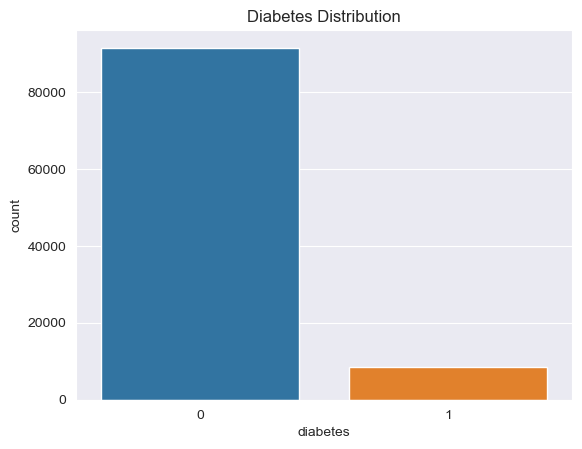

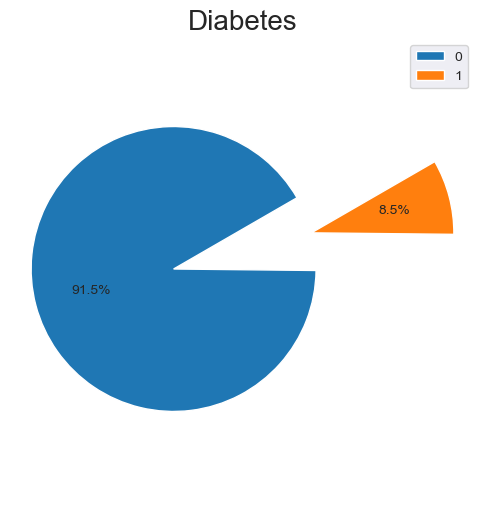

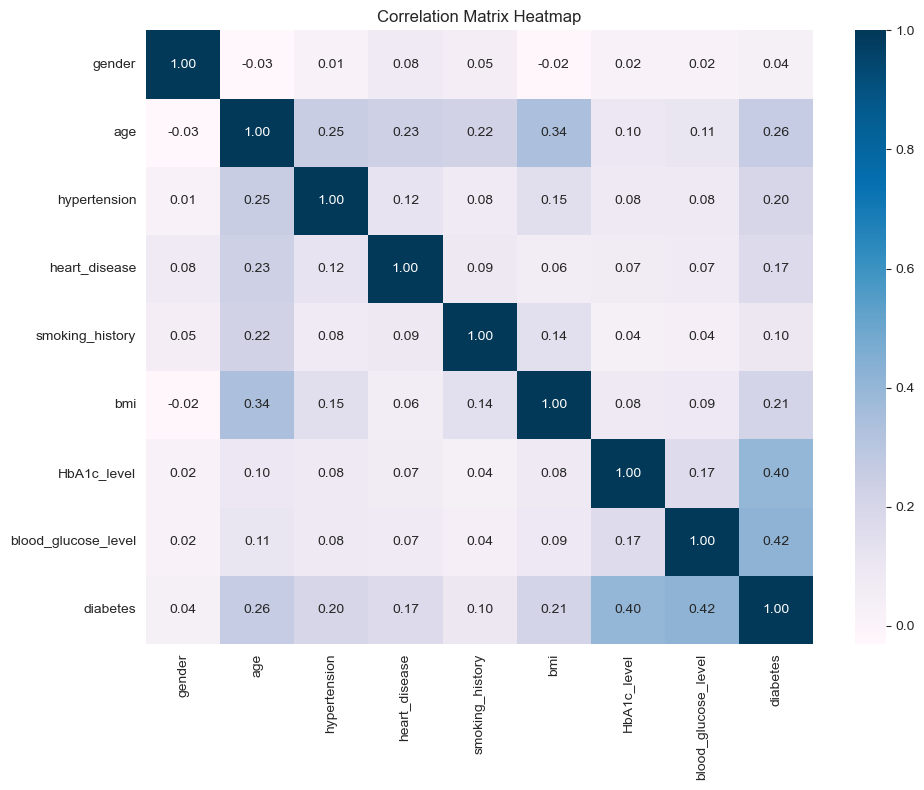

In [3]:
# 查看數據是否平衡。結論：不平衡資料集
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

# 數據平衡（圓餅圖）
def balanced_plot(data):
    plt.figure(figsize=(6, 6))
    plt.pie(df.diabetes.value_counts(),
            df.diabetes.value_counts().index,
            autopct='%1.1f%%',
            startangle=30)
    plt.title('Diabetes', fontsize = 20)
    plt.legend(df.diabetes.value_counts().index, loc='best')
    plt.axis('equal')  # 使圖形呈圓形
    plt.show()

balanced_plot(df)

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='PuBu', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from collections import Counter
X = df_labelEn.drop(columns=['diabetes'])
y = df_labelEn['diabetes']

# 切分訓練資料、測試資料
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=test_size)
print(X_train.shape, X_test.shape, y_train.shape, y_test)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

print("Number transactions x_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

(70000, 8) (30000, 8) (70000,) 4258     0
9        0
16826    0
32039    0
84987    0
        ..
44235    0
27345    0
37505    0
82014    0
97869    0
Name: diabetes, Length: 30000, dtype: int64
Training target statistics: Counter({0: 64050, 1: 5950})
Testing target statistics: Counter({0: 27450, 1: 2550})
Number transactions x_train dataset:  (70000, 8)
Number transactions y_train dataset:  (70000,)
Number transactions x_test dataset:  (30000, 8)
Number transactions y_test dataset:  (30000,)


In [6]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='lbfgs', max_iter=300)
logistic_model.fit(X_train, y_train)
logistic_model.predict(X_test)
logistic_model.predict_proba(X_test)
LogisticRegression_score = logistic_model.score(X_test, y_test)
print(LogisticRegression_score)

0.9608333333333333
